In [2]:
%load_ext autotime

In [4]:
%run -i sunRay_v0


----------------------------------
Frequency : [64.65MHz
Compute with : cpu
----------------------------------
Traced final t : 4.0393214 s
time: 1.22 s


array([1.94791146e-02, 1.72621512e+00, 3.48708010e+00, 5.24793339e+00,
       7.00878143e+00, 8.74676132e+00, 1.05076094e+01, 1.22684574e+01,
       1.40293055e+01, 1.57901535e+01, 1.75510654e+01, 1.93119869e+01,
       2.10729084e+01, 2.28338299e+01, 2.45947514e+01, 2.63328037e+01,
       2.80937252e+01, 2.98546467e+01, 3.16155682e+01, 3.33764877e+01,
       3.51374092e+01, 3.68983307e+01, 3.86592522e+01, 4.04201736e+01,
       4.21810951e+01, 4.39191475e+01, 4.56800690e+01, 4.74409904e+01,
       4.92019119e+01, 5.09628334e+01, 5.27237549e+01, 5.44846764e+01,
       5.62455978e+01, 5.80065193e+01, 5.97674408e+01, 6.15054932e+01,
       6.32664146e+01, 6.50271683e+01, 6.67877960e+01, 6.85484238e+01],
      dtype=float32)

In [14]:
r_vec_collect_local[:,1,0]

array([-1.3876816e-03, -1.0132617e-01, -2.0449620e-01, -3.0418181e-01,
       -4.0417305e-01, -5.0452960e-01, -6.0825884e-01, -7.0856714e-01,
       -8.0784553e-01, -9.1010183e-01, -1.0083187e+00, -1.1065427e+00,
       -1.2086917e+00, -1.3081546e+00, -1.4080760e+00, -1.5082921e+00,
       -1.6127403e+00, -1.7141494e+00, -1.8164245e+00, -1.9221402e+00,
       -2.0242743e+00, -2.1261678e+00, -2.2280972e+00, -2.3330457e+00,
       -2.4344070e+00, -2.5353646e+00, -2.6394193e+00, -2.7406645e+00,
       -2.8416965e+00, -2.9429154e+00, -3.0477595e+00, -3.1484680e+00,
       -3.2483420e+00, -3.3521698e+00, -3.4522858e+00, -3.5519607e+00,
       -3.6543491e+00, -3.7528756e+00, -3.8522370e+00, -3.9525914e+00,
       -4.0559154e+00, -4.1556129e+00, -4.2547779e+00, -4.3554797e+00,
       -4.4524641e+00, -4.5489235e+00, -4.6458669e+00, -4.7456141e+00,
       -4.8422127e+00, -4.9389009e+00, -5.0386515e+00, -5.1356249e+00,
       -5.2332869e+00, -5.3340869e+00, -5.4312010e+00, -5.5283647e+00,
      

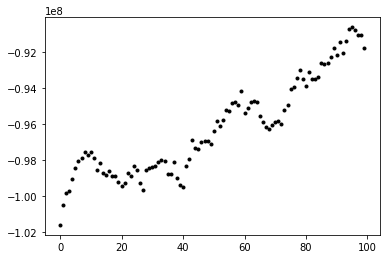

In [36]:
plt.plot(k_vec_collect[:,0,0],'k.')

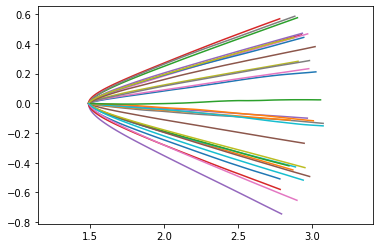

time: 329 ms


In [6]:
for num in range(photon_N):
    plt.plot(r_vec_collect[:,2,num],r_vec_collect[:,1,num])
    plt.axis('equal')

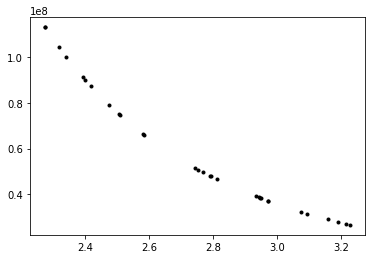

In [23]:
amp = lambda x : torch.sqrt(torch.sum(x.pow(2),axis=0))

plt.plot(amp(r_vec),amp(domega_pe_dxyz),'k.')

In [11]:
domega_pe_dr.shape

torch.Size([30])

In [25]:
pfreq.omega_pe_r(ne_r,rr_cur)[0]

tensor(0.0083, dtype=torch.float64)

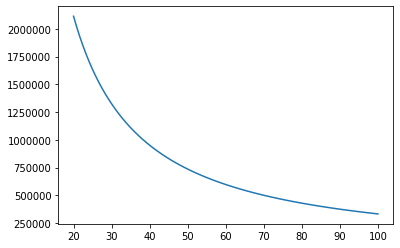

In [29]:
rr_test = torch.linspace(20,100,100)
plt.plot(rr_test,pfreq.omega_pe_r(ne_r,rr_test))


In [34]:
rr_cur

tensor([4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08,
        4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08,
        4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08,
        4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08, 4.0626e+08,
        4.0626e+08, 4.0626e+08, 4.0624e+08, 4.0626e+08, 4.0625e+08, 4.0627e+08],
       dtype=torch.float64)

In [31]:
start_r

tensor([1.5000])